# Explore here

In [39]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [40]:
#Step 1: Loading the dataset
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

print("California Housing:")
print(df.head())

California Housing:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [41]:
#Eliminating irrelevant variables
df.drop(["HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "MedHouseVal"], axis = 1, inplace = True)
df.head()


,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [42]:
# Split the dataset into train and test sets (only X variables in case of unsupervised model)
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)
X_train.head()


,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


In [43]:
#Step 2: Building a K-Means model on the training set
kmeans_model = KMeans(n_clusters=6, random_state=42)
kmeans_model.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [44]:
#Insert cluster into dataset
y_train = list(kmeans_model.labels_)
X_train["cluster"] = y_train
X_train.head()

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


In [45]:
X_test.head()

,MedInc,Latitude,Longitude
20046,1.6812,36.06,-119.01
3024,2.5313,35.14,-119.46
15663,3.4801,37.80,-122.44
20484,5.7376,34.28,-118.72
9814,3.7250,36.62,-121.93


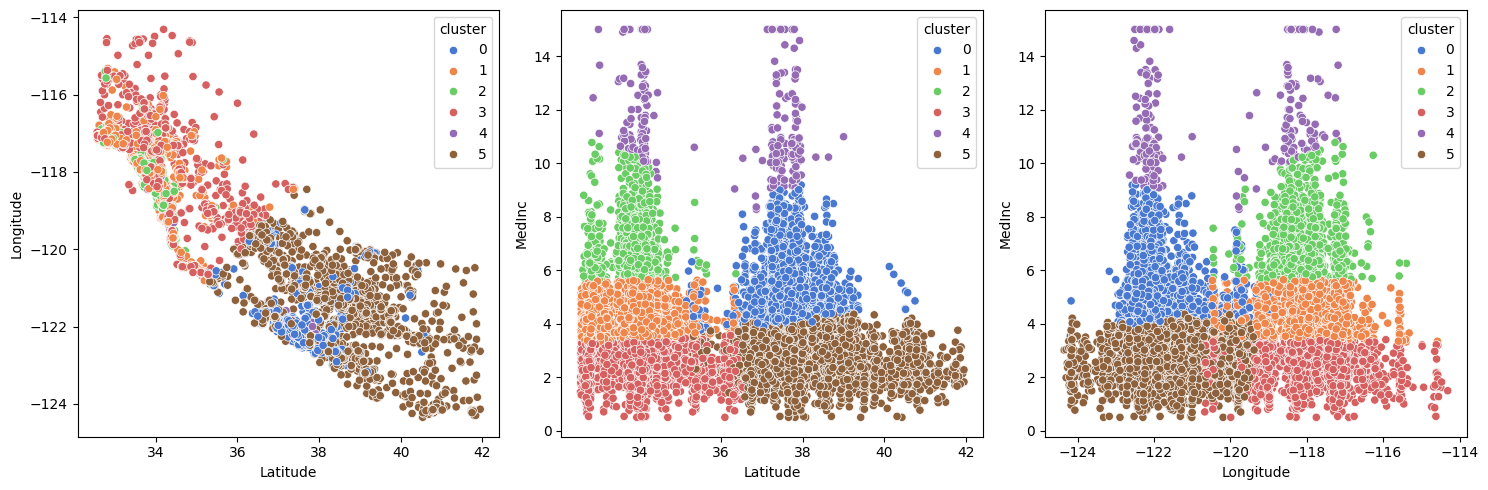

In [46]:
#Plotting the Clusters
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "muted")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "muted")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "muted")
plt.tight_layout()

plt.show()

In [47]:
#Step 3: Predicting with the test set
y_test = kmeans_model.predict(X_test)
X_test["cluster"] = y_test
X_test.head()


,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


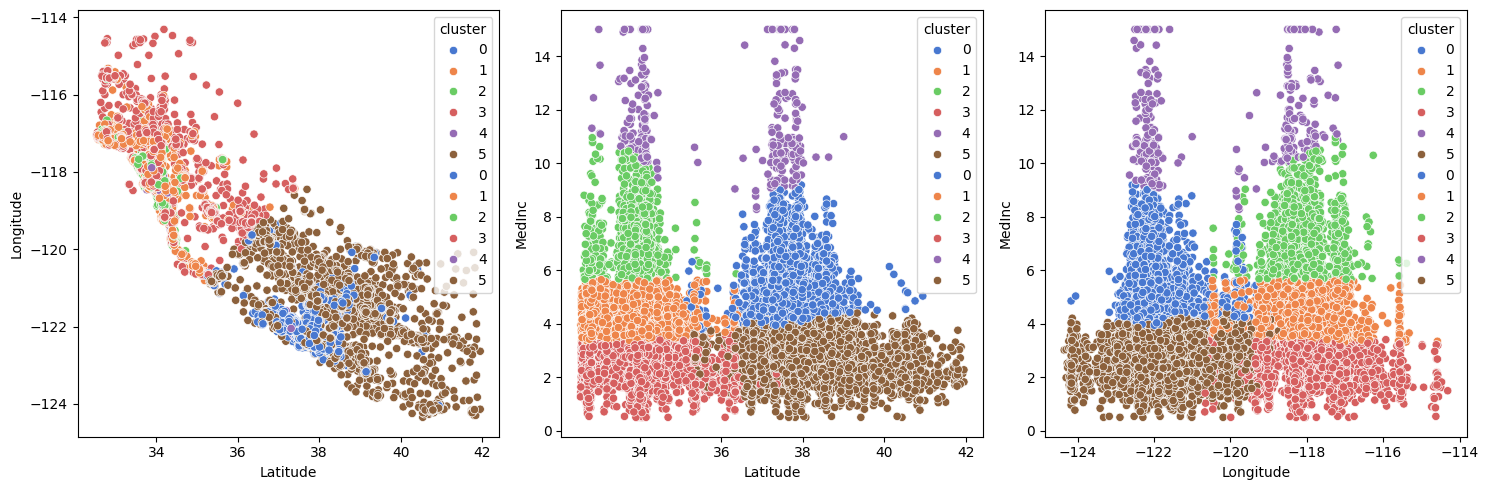

In [48]:
#Adding the predicted points to the above plot 
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "muted")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "muted")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "muted")
sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "cluster", palette = "muted")
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "cluster", palette = "muted")
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "cluster", palette = "muted")

plt.tight_layout()

plt.show()

In [49]:
#Step 4: Training a supervised classification model
from xgboost import XGBClassifier

boosting_model = XGBClassifier(random_state = 42)
boosting_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [50]:
y_pred = boosting_model.predict(X_test)
y_pred

array([3, 3, 5, ..., 4, 5, 1])

In [51]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

The model is perfect (accuracy 100%). The model was chosen due to being capable of capturing complex relationships in the data because is iteratively refines its predictions. This iterative process allows the model to handle non-linear relationships more effectively.

In [52]:
#Step 5: Saving the models
from pickle import dump

dump(kmeans_model, open("/workspaces/K-means-Project-Liutciia/models/k-means_default_42.sav", "wb")) 
dump(boosting_model, open("/workspaces/K-means-Project-Liutciia/models/boosting_default_42.sav", "wb"))
